In [ ]:
!nvidia-smi

Thu Jan 25 03:54:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import torch
import random
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from ultralytics import YOLO
import cv2
import imageio
from IPython.display import display, Image, HTML
from IPython import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/ML/

/content/drive/My Drive/ML


#**Train**

In [ ]:
!yolo task = detect mode = train model = yolov8n.pt data = /content/drive/MyDrive/ML/config.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ML/config.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

#**Predict**

In [ ]:
#Predict bằng pretrain model (yolov8n) (test)
!yolo task=detect mode=predict model= yolov8n.pt show=True conf=0.5 source = /content/drive/MyDrive/ML/test

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/7 /content/drive/MyDrive/ML/test/test0.jpg: 448x640 (no detections), 118.3ms
image 2/7 /content/drive/MyDrive/ML/test/test1.jpg: 448x640 1 stop sign, 7.3ms
image 3/7 /content/drive/MyDrive/ML/test/test2.jpg: 448x640 (no detections), 6.7ms
image 4/7 /content/drive/MyDrive/ML/test/test3.jpg: 480x640 3 persons, 1 bus, 1 traffic light, 65.0ms
image 5/7 /content/drive/MyDrive/ML/test/test4.jpg: 384x640 (no detections), 68.2ms
video 6/7 (1/552) /content/drive/MyDrive/ML/test/IMG_1117.MOV: 640x384 9 persons, 1 car, 67.6ms
video 6/7 (2/552) /content/drive/MyDrive/ML/test/IMG_1117.MOV: 640x384 10 persons, 10.0ms
video 6/7 (3/552) /content/drive/MyDrive/ML/test/IMG_1117.MOV: 640x384 8 persons, 9.2ms
video 6/7 (4/552) /content/drive/MyDrive/ML/test/IM

In [ ]:
#Predict bằng custom model
!yolo task=detect mode=predict model= /content/drive/MyDrive/ML/yolo_custom.pt show=True conf=0.5 source = /content/drive/MyDrive/ML/test

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3215261 parameters, 0 gradients, 9.0 GFLOPs

image 1/7 /content/drive/MyDrive/ML/test/test0.jpg: 448x640 1 Cam xe moto, 1 Cam xe tai, 1 Toc do toi da 40, 66.2ms
image 2/7 /content/drive/MyDrive/ML/test/test1.jpg: 448x640 1 Cam xe tai <= 2.5T, 1 Toc do toi da 50, 7.4ms
image 3/7 /content/drive/MyDrive/ML/test/test2.jpg: 448x640 1 Cam di nguoc chieu, 1 Cam do xe, 1 Toc do toi da 40, 6.8ms
image 4/7 /content/drive/MyDrive/ML/test/test3.jpg: 480x640 1 Di vao dung lan duong, 64.7ms
image 5/7 /content/drive/MyDrive/ML/test/test4.jpg: 384x640 1 Cam xe tai, 89.5ms
video 6/7 (1/552) /content/drive/MyDrive/ML/test/IMG_1117.MOV: 640x384 (no detections), 81.2ms
video 6/7 (2/552) /content/drive/MyDrive/ML/test/IMG_1117.MOV: 640x384 (no detections), 9.7ms
video 6/7 (3/552) /content/drive/MyDrive/ML/test/IMG_

In [ ]:
def imShow(path):
  %matplotlib inline
  image = cv2.imread('/content/drive/MyDrive/ML/runs/detect/predict/' + path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

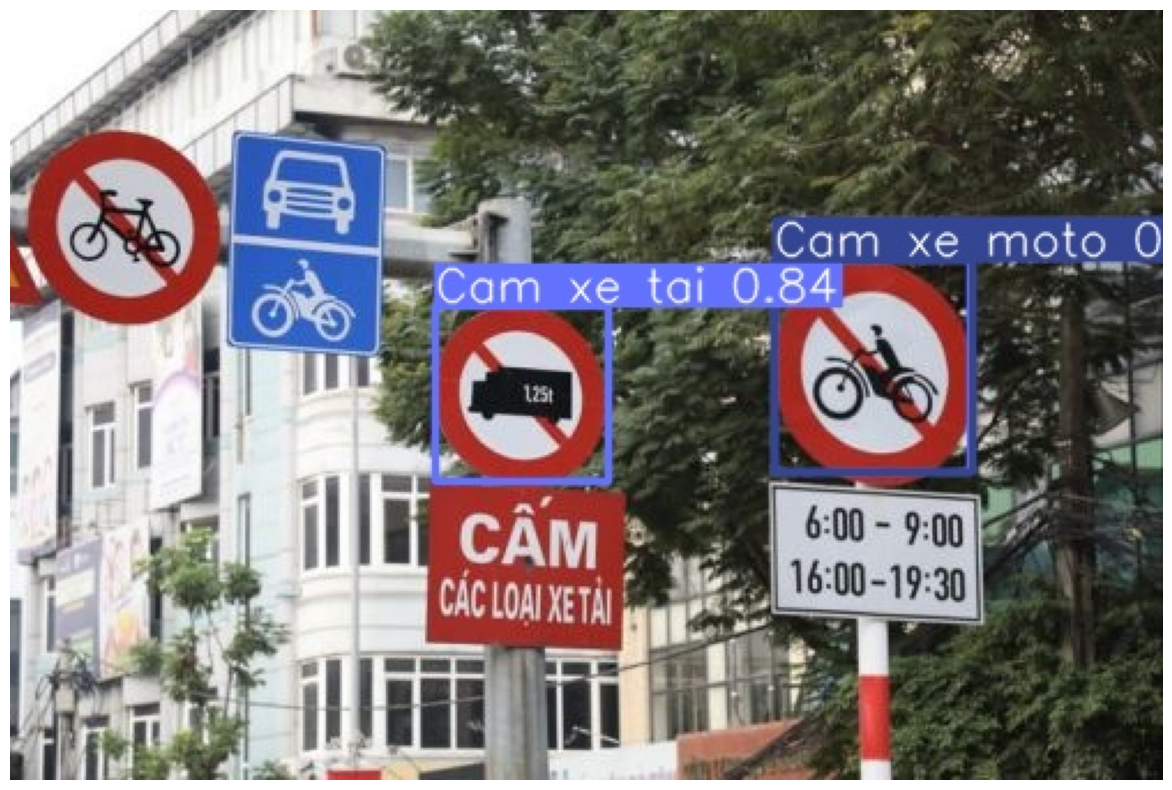

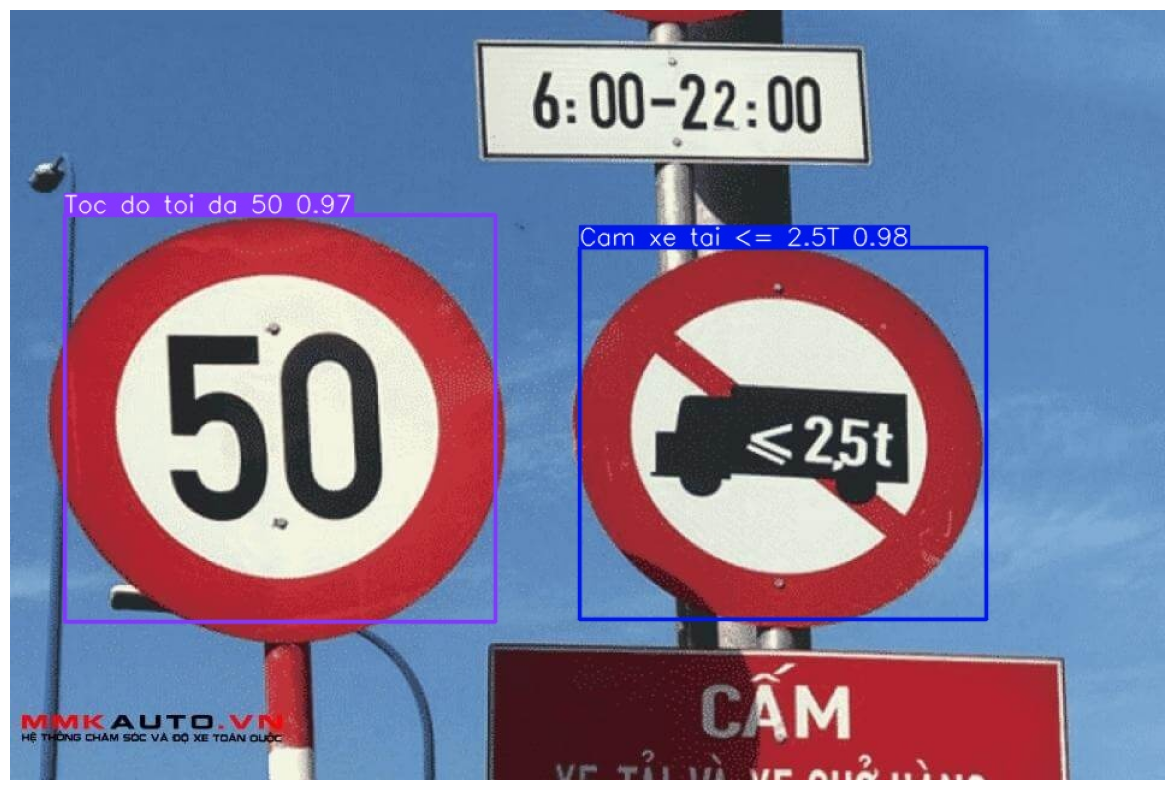

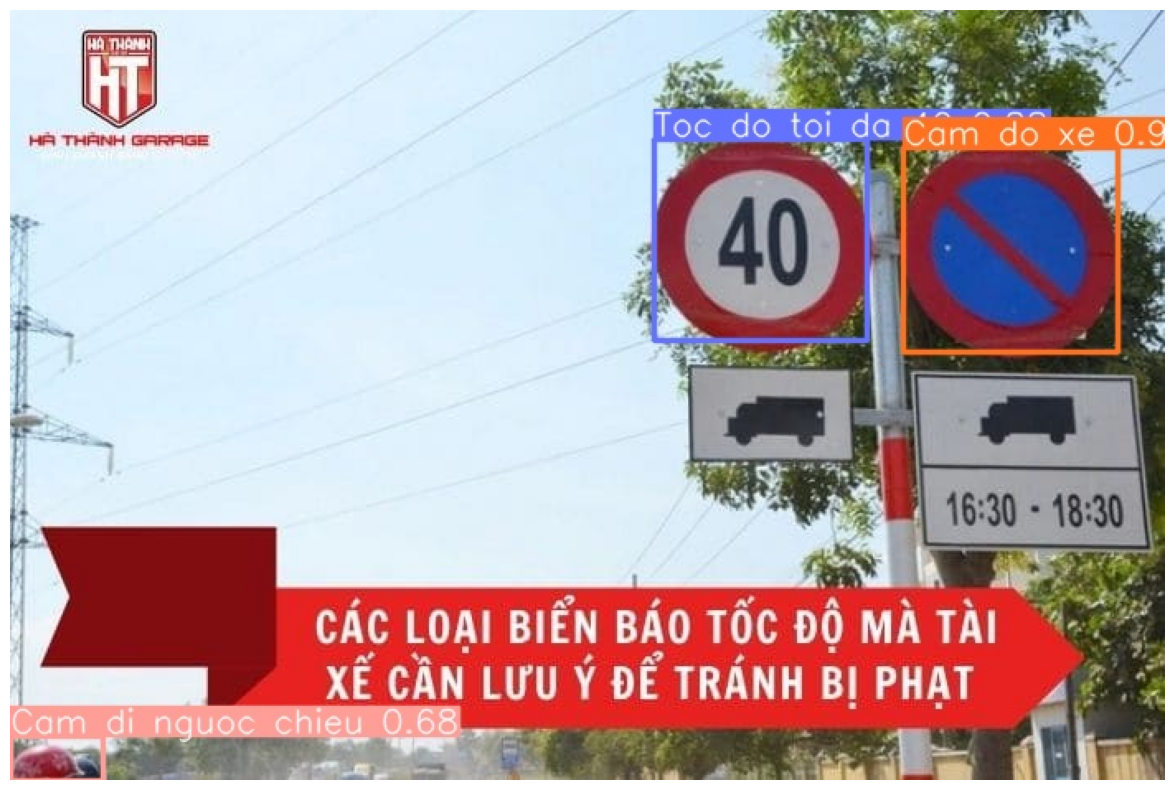

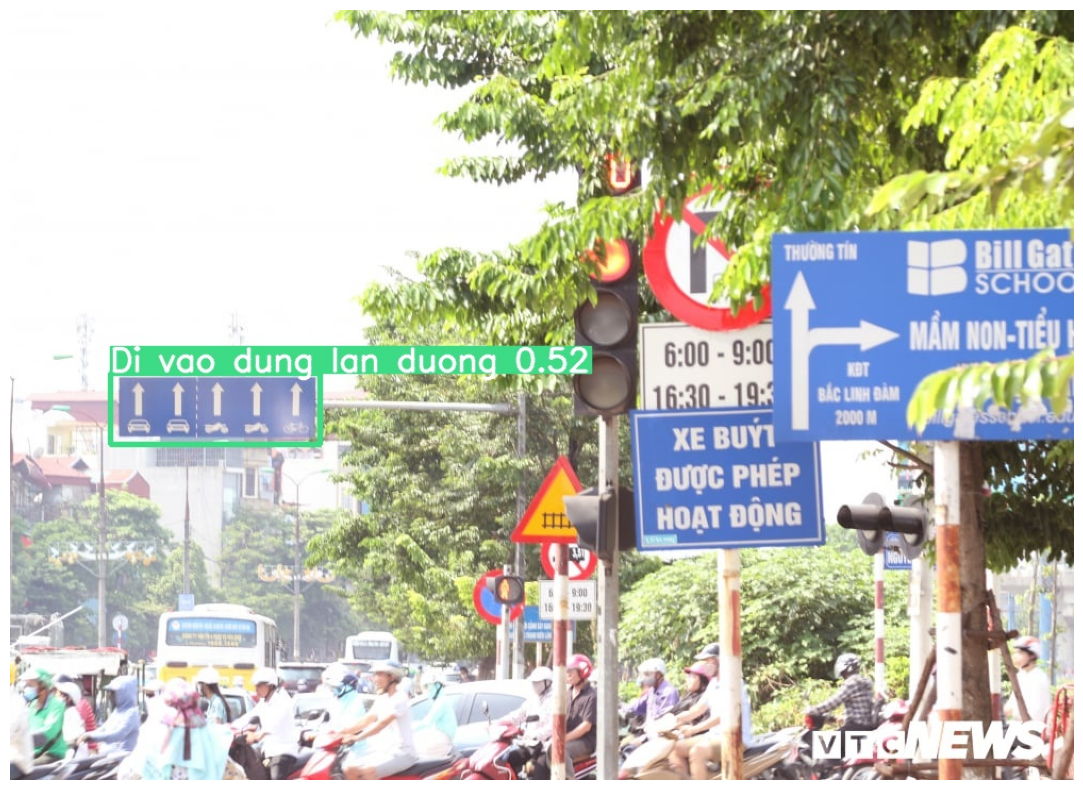

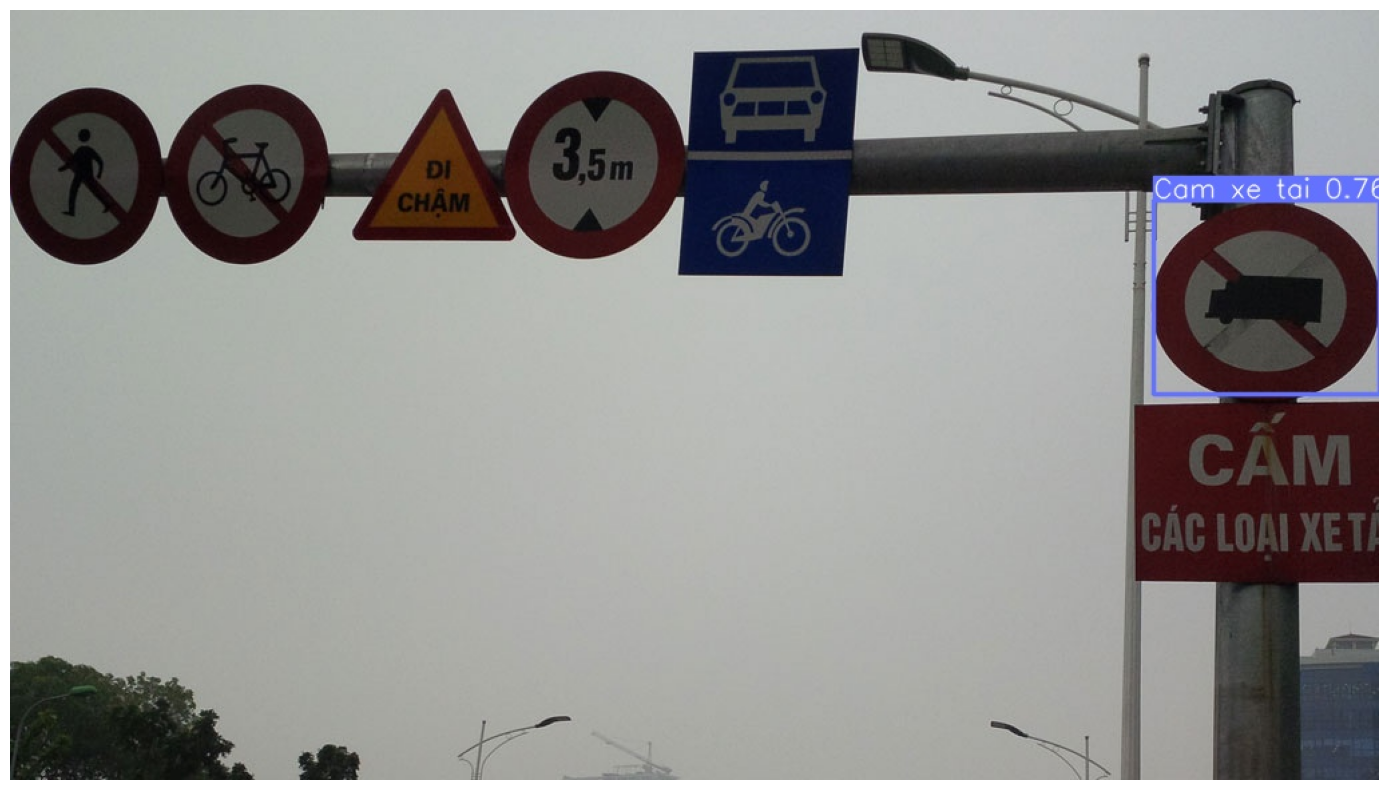

In [ ]:
image_path = '/content/drive/MyDrive/ML/runs/detect/predict'
files = os.listdir(image_path)
for file in files:
    if file.split('.')[1] == 'jpg':
      imShow(file)

In [ ]:
video_path = '/content/drive/MyDrive/ML/runs/detect/predict'
files = os.listdir(video_path)
for file in files:
    if file.split('.')[1] == 'avi':
      print(file)

IMG_1117.avi
IMG_1129.avi


#**Đánh giá mô hình**

In [ ]:
result_path = '/content/drive/MyDrive/ML/runs/detect/train5/results.csv'

results = pd.read_csv(result_path)
results

epoch           train/box_loss           train/cls_loss  \
0                         1                  1.38590                   5.8177   
1                         2                  1.29380                   5.5498   
2                         3                  1.27180                   5.1771   
3                         4                  1.30990                   4.8878   
4                         5                  1.27750                   4.4909   
..                      ...                      ...                      ...   
95                       96                  0.90439                   1.6256   
96                       97                  0.89098                   1.6072   
97                       98                  0.87393                   1.5615   
98                       99                  0.89870                   1.5960   
99                      100                  0.88001                   1.5842   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.18760                  0.00000                  0.00000   
1                   1.09690                  0.00000                  0.00000   
2                   1.05720                  0.00747                  0.10621   
3                   1.05940                  0.01315                  0.30395   
4                   1.07000                  0.61742                  0.11512   
..                      ...                      ...                      ...   
95                  0.98324                  0.76388                  0.44225   
96                  0.98583                  0.73942                  0.45086   
97                  0.98728                  0.75537                  0.44290   
98                  0.98365                  0.74885                  0.44115   
99                  0.97600                  0.63801                  0.49024   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                   0.00000                  0.00000                   1.1894   
1                   0.00000                  0.00000                   1.1821   
2                   0.03955                  0.03222                   1.1567   
3                   0.08455                  0.06182                   1.2055   
4                   0.07608                  0.05685                   1.2106   
..                      ...                      ...                      ...   
95                  0.55626                  0.38778                   1.2034   
96                  0.55596                  0.38821                   1.2015   
97                  0.55725                  0.38881                   1.2029   
98                  0.55670                  0.38617                   1.2085   
99                  0.55632                  0.38747                   1.2103   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
0                    5.1006                  1.06750                 0.000024   
1                    4.9395                  1.01030                 0.000049   
2                    4.5625                  0.98441                 0.000073   
3                    4.1177                  1.00830                 0.000097   
4                    3.7513                  1.03110                 0.000106   
..                      ...                      ...                      ...   
95                   1.8609                  1.16680                 0.000008   
96                   1.8512                  1.16400                 0.000007   
97                   1.8503                  1.16210                 0.000005   
98                   1.8585                  1.16310                 0.000004   
99                   1.8509                  1.16250                 0.000003   

                     lr/pg1                   lr/pg2  
0                  0.000024                 0.000024  
1                  0

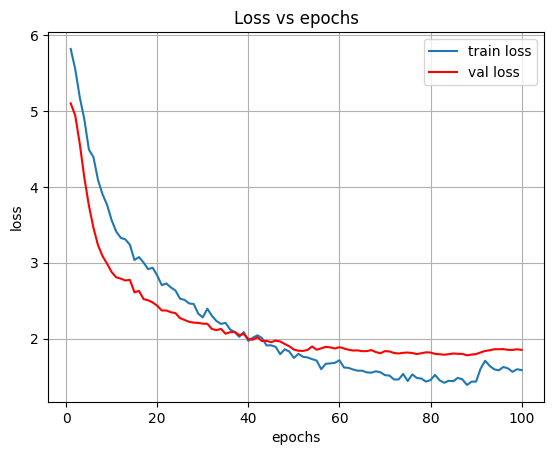

In [ ]:
plt.figure()
plt.plot(results['                  epoch'], results['         train/cls_loss'], label='train loss')
plt.plot(results['                  epoch'], results['           val/cls_loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

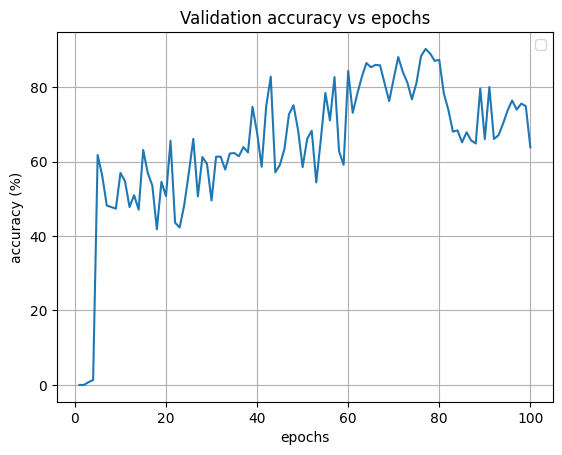

In [ ]:
plt.figure()
plt.plot(results['                  epoch'], results['   metrics/precision(B)'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.legend()

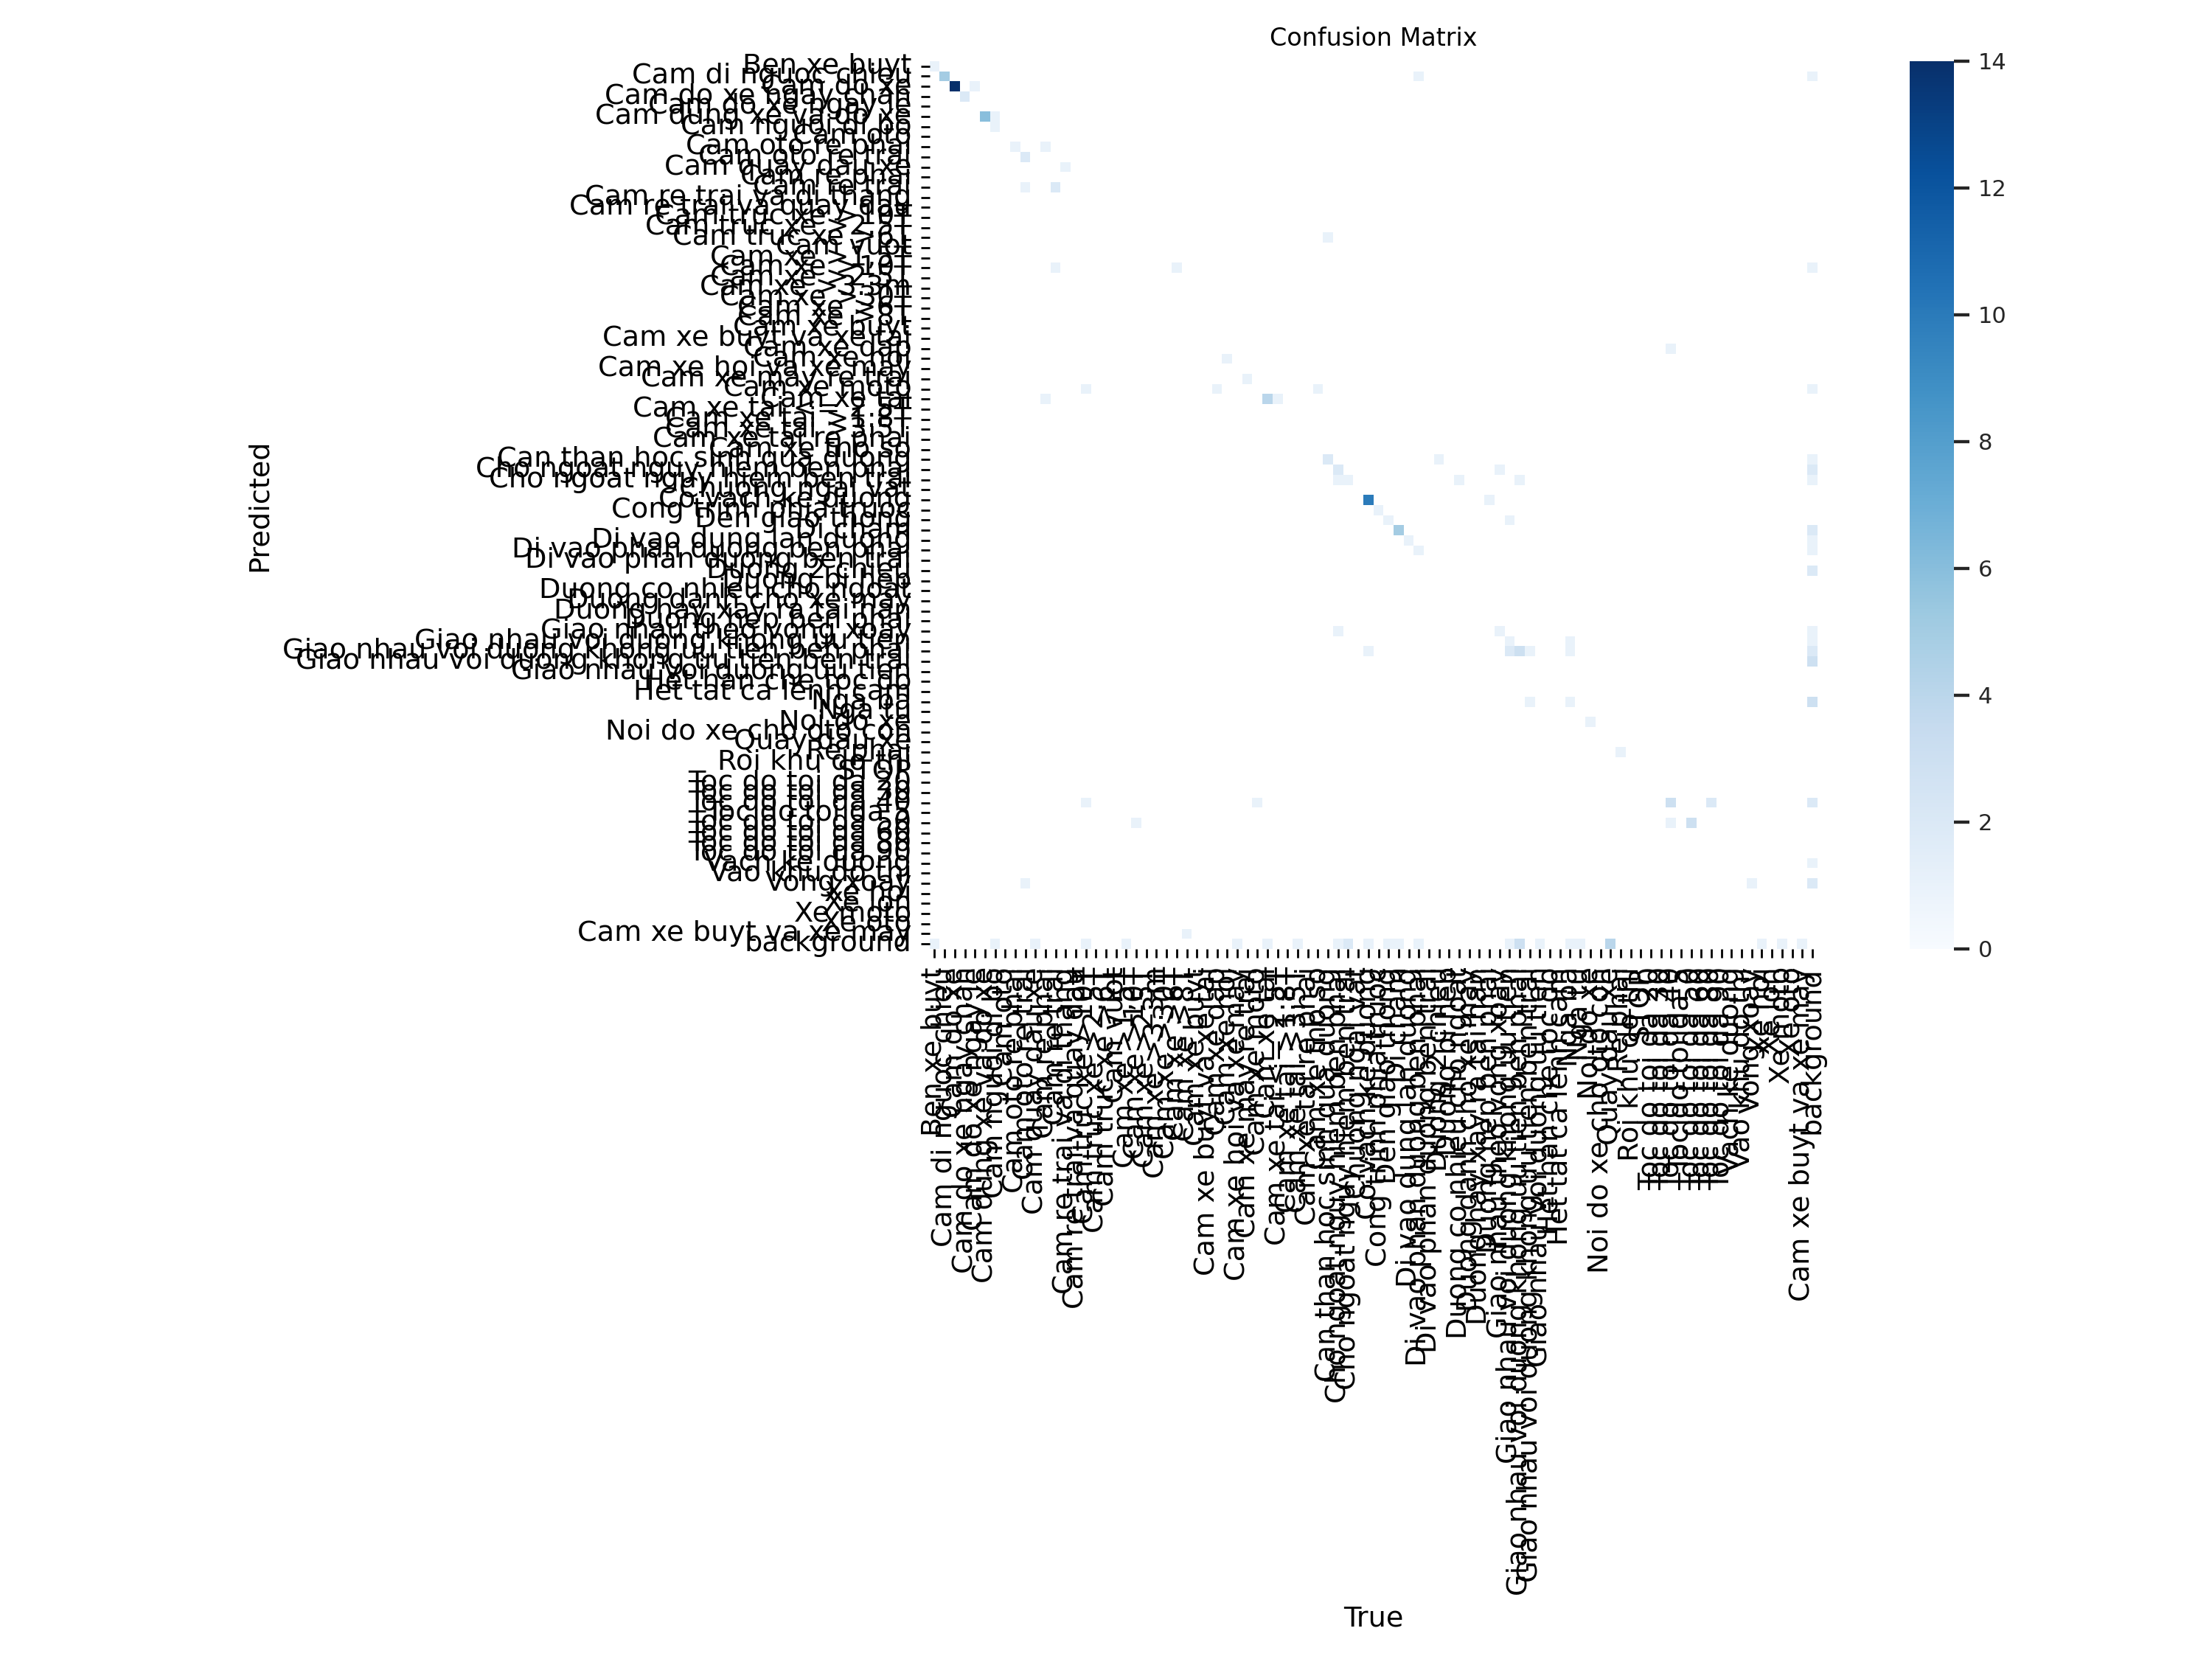

In [ ]:
#Confusion Matrix
Image(data='/content/drive/MyDrive/ML/runs/detect/train5/confusion_matrix.png', width=1000)

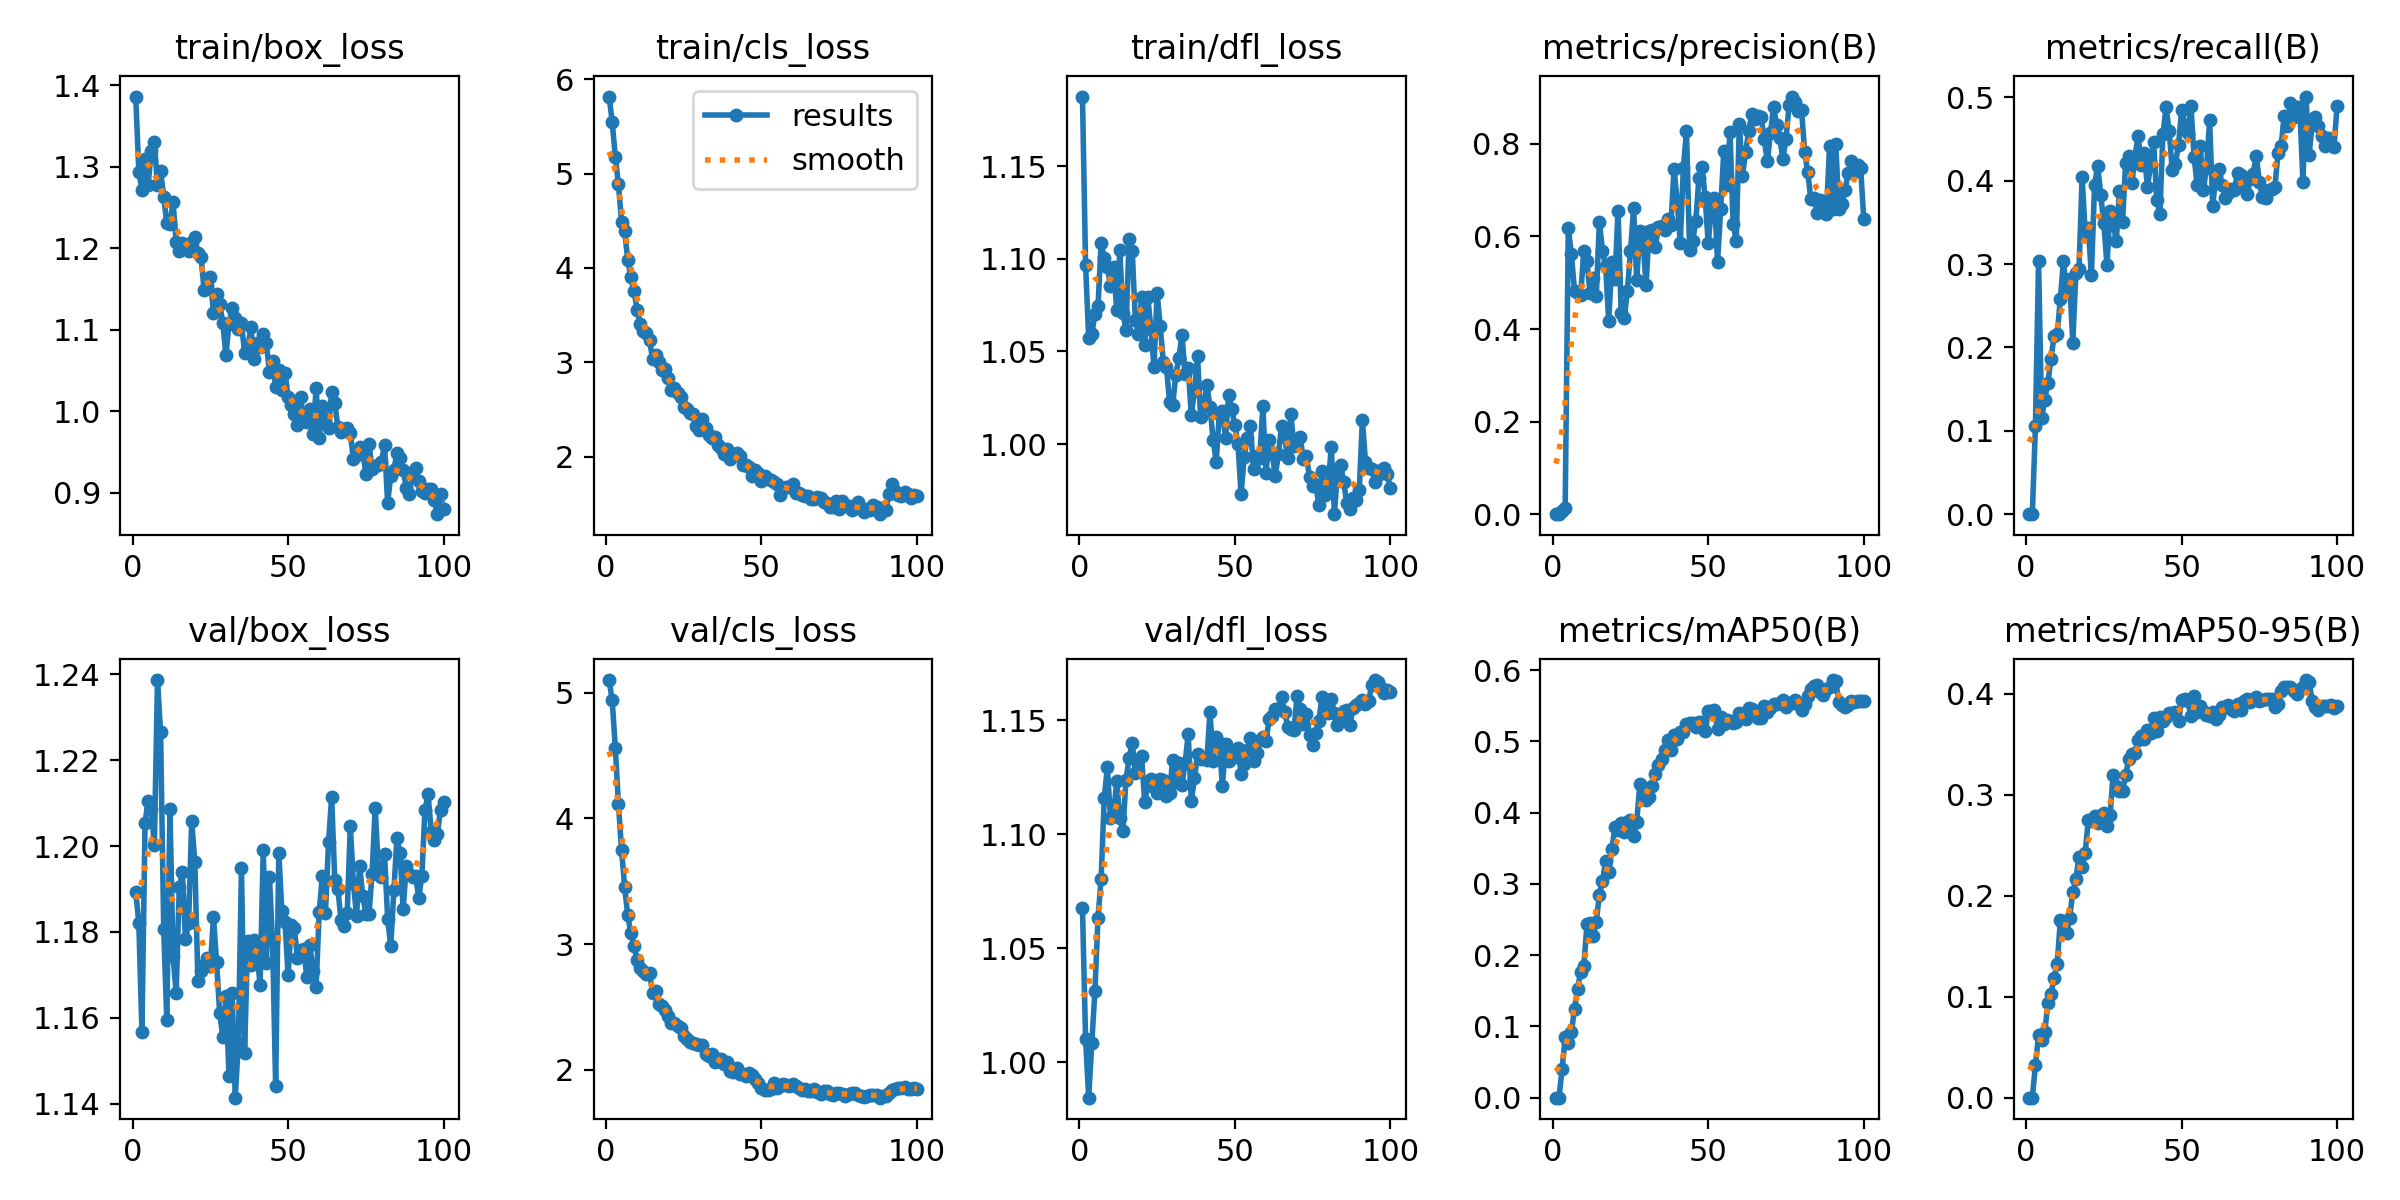

In [ ]:
Image(data='/content/drive/MyDrive/ML/runs/detect/train5/results.png', width=1000)